In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import time
from matplotlib import pyplot as plt

**Homework:**

1. Create a new signal of frequency 10kHz, amplitude 5V, DC offset of 2.5 V. Then digitise the signal using 4 bits per value. You will need to play around with the bit depth and the range.
2. Modify the ADC to add noise to the signal, then average the noisy values. You may want to look at [Michael's Notes](https://github.com/phys3112/intro/blob/master/mcba3-analog-to-digital-conversion.ipynb) for inspiration.

In [3]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# Making our adc function! This is not the most efficient way of doing it, but I hope it's easier to understand.
def adc1(signal, num_bits, input_range):
    # A function to digitise an analogue signal
        # Signal is a list or 1D array of all the values
        # num_bits is the number of bits (1s or zeros) we will have in our ADC
        # input_range is the range of inputs we will allow, as a tuple (min, max)
    
    # Extract the min and max values from the input range
    sig_min, sig_max = input_range
    # Generate the discrete levels that our ADC is going to map the real signal to
    disc_levels = np.linspace(sig_min, sig_max, 2**num_bits)
    print(disc_levels)
    
    # For each element in the signal, match it to the closest discrete level:
    out = list() # Create an empty output array
    for i in signal:
        out.append(find_nearest(disc_levels,i))
        
    return out

[-2.5        -1.83333333 -1.16666667 -0.5         0.16666667  0.83333333
  1.5         2.16666667  2.83333333  3.5         4.16666667  4.83333333
  5.5         6.16666667  6.83333333  7.5       ]


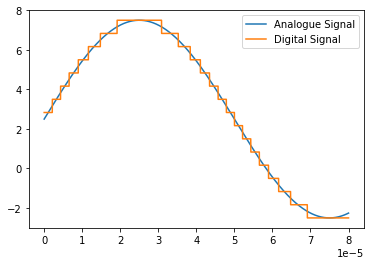

In [49]:
# We have made a BASIC digitiser - check it out above.
# Let's test it out using a sinusoid
samples = 100000
final = 0.00008
timebase = np.arange(0, final, final/samples)
signal = 5*np.sin(2*np.pi*10**4*timebase) + 2.5
plt.plot(timebase,signal,'-')

plt.plot(timebase,adc1(signal, 4, (-2.5,7.5)),'-')
plt.legend(["Analogue Signal", "Digital Signal"])

**Homework**

1. Try out some other input signals such as your own experimental data, ExpData.txt or BeatsHighRaw.txt)
2. Try out an inverse fourier transform, how does it compare to the original data?
3. Have a look at 2d fourier transforms (they are pretty cool)